# Goal of the project

The goal of this project is to build a regression model to predict real estate prices in France.

# Useful Links

Link for the repository on GitHub:

https://github.com/tlemenestrel/Real_Estate_Prices_Prediction

Link for the .csv file:

Real Estate Prices

https://raw.githubusercontent.com/tlemenestrel/Real_Estate_Prices_Prediction/master/Data_Real_Estate.csv

# Real Estate Prices Prediction Model

### Import the necessary modules

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Models 

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Statistics

from sklearn.metrics import mean_squared_error, r2_score

# Train-test-split

from sklearn.model_selection import train_test_split

# Random and Grid Search for hyperparameters tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Plotting features importance for XGBoost

from xgboost import plot_importance

# Plotting out one tree of the XGBoost model

from sklearn.tree import export_graphviz
from graphviz import Source

### Downloading the Real Estate Prices .csv file from GitHub

In [215]:
url_employment_rates = "https://raw.githubusercontent.com/tlemenestrel/Real_Estate_Prices_Prediction/master/Data_Real_Estate.csv"

# Reading the downloaded content and making it a pandas dataframe

df = pd.read_csv(url_employment_rates)

# Printing out the first 5 rows of the dataframe

print (df.head())
print (df.shape)

              City Region Type  Area   Rent   Price
0  Aix En Provence   Paca   F2    55   8257  280500
1  Aix En Provence   Paca   F2    49  11333  342370
2  Aix En Provence   Paca   F2    49  12158  342370
3  Aix En Provence   Paca   F2    49  12433  334560
4  Aix En Provence   Paca   F3    54   4134   97200
(368, 6)


### Function to print out the data type of each column

In [216]:
def print_data_type_of_dataframe_columns(df):
    
    dataTypeSeries = df.dtypes
 
    print('Data type of each column of Dataframe :')
    print(dataTypeSeries)

### Printing out the data type of each columns of the dataframe

In [217]:
print_data_type_of_dataframe_columns(df)

Data type of each column of Dataframe :
City      object
Region    object
Type      object
Area       int64
Rent       int64
Price      int64
dtype: object


# Exploratory Data Analysis (EDA)

In this part of the notebook, we are going to perform initial investigations on the data to discover patterns, spot anomalies, test hypotheses and  check assumptions with the help of summary statistics and graphical representations.

# Price, rent and area

### Function to plot out one column of a dataframe

In [218]:
def plot_out_one_column_of_a_dataframe(df, column):
    
    ax = df[column].plot(kind="bar")

### Plotting out out the Price column

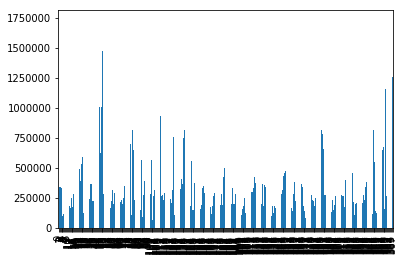

In [219]:
plot_out_one_column_of_a_dataframe(df,'Price')

### Plotting out the Rent column

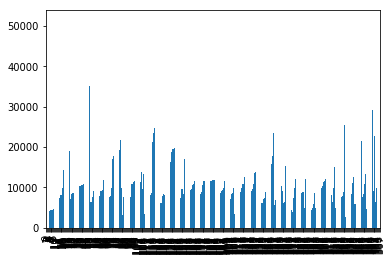

In [220]:
plot_out_one_column_of_a_dataframe(df,'Rent')

### Plotting out the Area column

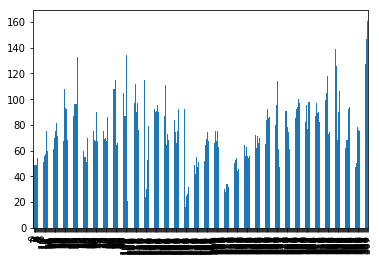

In [221]:
plot_out_one_column_of_a_dataframe(df,'Area')

### Notes

There is quite a bit of disparity in the data for those 3 variables. For better results, we will remove all examples above 3 standard deviations.

### Removing outliers that are above 3 standard deviations

In [222]:
#df = df[((df.Price - df.Price.mean()) / df.Price.std()).abs() < 3]
#df = df[((df.Rent - df.Rent.mean()) / df.Rent.std()).abs() < 3]
#df = df[((df.Area - df.Area.mean()) / df.Area.std()).abs() < 3]

print (df.shape)

(368, 6)


# How important is the region in the price?

The dataset contained 4 different regions: Rhônes Alpes, PACA, Ile de France and Sud Ouest

### Computing the average price by region

In [223]:
type_means = df.groupby('Region')['Price'].mean()

#Sorting the values by descending order

type_means = type_means.sort_values(ascending = False)

### Plotting the results

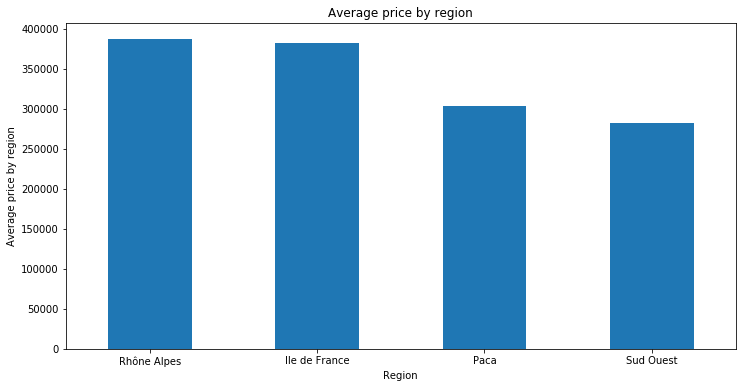

In [224]:
plot_type_means = type_means.plot.bar(x='Region',y='Price', rot =0,figsize = (12,6), title = 'Average price by region')
plot_type_means.set_xlabel("Region")
plot_type_means.set_ylabel("Average price by region")
plt.savefig('Images/average_price_by_region.png', bbox_inches='tight')
plt.show()

# How important is the region in the price?

The dataset contained 11 different cities: Rhônes Alpes, PACA, Ile de France and Sud Ouest

### Computing the average price by region

In [225]:
type_means = df.groupby('City')['Price'].mean()

#Sorting the values by descending order

type_means = type_means.sort_values(ascending = False)

### Plotting the results

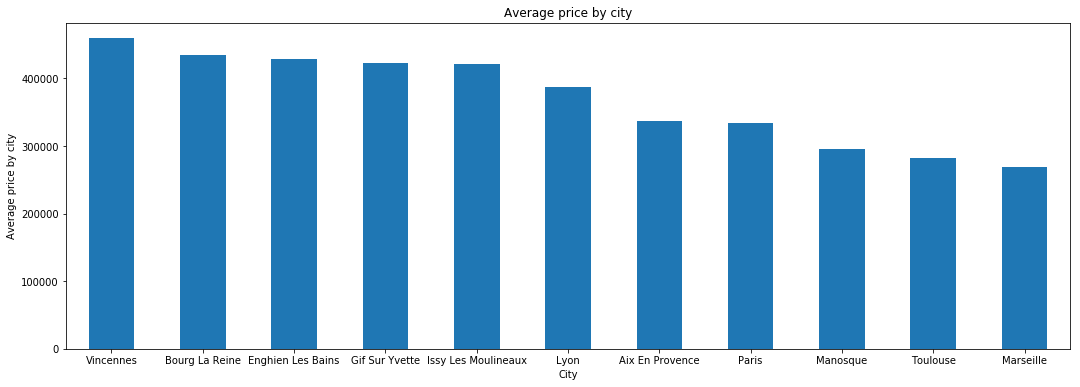

In [226]:
plot_type_means = type_means.plot.bar(x='City',y='Price', rot =0,figsize = (18,6), title = 'Average price by city')
plot_type_means.set_xlabel("City")
plot_type_means.set_ylabel("Average price by city")
plt.savefig('Images/average_price_by_city.png', bbox_inches='tight')
plt.show()

# How important is the type in the price?

The dataset contained five different types: Rhônes Alpes, Grand Est, PACA, Ile de France and Sud Ouest

### Computing the average price by type

In [227]:
type_means = df.groupby('Type')['Price'].mean()

#Sorting the values by descending order

type_means = type_means.sort_values(ascending = False)

### Plotting the results

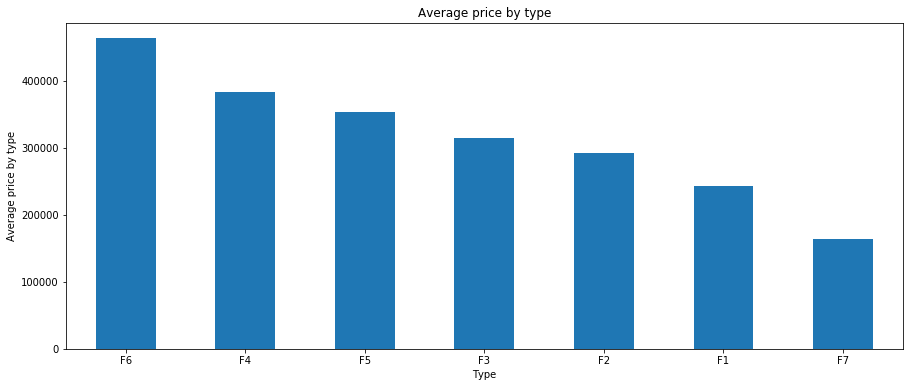

In [228]:
plot_type_means = type_means.plot.bar(x='Type',y='Price', rot =0,figsize = (15,6), title = 'Average price by type')
plot_type_means.set_xlabel("Type")
plot_type_means.set_ylabel("Average price by type")
plt.savefig('Images/Average_price_by_type.png', bbox_inches='tight')
plt.show()

# Data Preparation

## Normalization

In this case, we do not have many outliers. Thus, we will use min-max normalization.

### Min-max normalization

In [229]:
def min_max_normalization_of_one_column(df,column):

    normalized_column = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return normalized_column

In [230]:
df["Price"] = min_max_normalization_of_one_column(df,"Price")
df["Area"] = min_max_normalization_of_one_column(df,"Area")
df["Rent"] = min_max_normalization_of_one_column(df,"Rent")

print (df)

                City         Region Type      Area      Rent     Price
0    Aix En Provence           Paca   F2  0.268966  0.133290  0.135059
1    Aix En Provence           Paca   F2  0.227586  0.195243  0.172050
2    Aix En Provence           Paca   F2  0.227586  0.211859  0.172050
3    Aix En Provence           Paca   F2  0.227586  0.217397  0.167381
4    Aix En Provence           Paca   F3  0.262069  0.050251  0.025466
..               ...            ...  ...       ...       ...       ...
363        Vincennes  Ile de France   F6  0.648276  0.164488  0.098887
364        Vincennes  Ile de France   F6  0.682759  0.213490  0.056735
365        Vincennes  Ile de France   F6  0.765517  0.245171  0.210637
366        Vincennes  Ile de France   F6  0.903448  0.341544  0.360218
367        Vincennes  Ile de France   F6  1.000000  0.794929  0.718179

[368 rows x 6 columns]


## Dropping columns

In [231]:
#df = df.drop(['Type'], axis = 1)
#df = df.drop(['Region'], axis = 1)
#df = df.drop(['City'], axis = 1)

## Encoding

### One-hot encoding

In [232]:
# Using the get_dummies function to one-hot encode several categorical variables

df = pd.get_dummies(df, columns= ['Region'])
df = pd.get_dummies(df, columns= ['City'])
df = pd.get_dummies(df, columns= ['Type'])

print (df.head())

       Area      Rent     Price  Region_Ile de France  Region_Paca  \
0  0.268966  0.133290  0.135059                     0            1   
1  0.227586  0.195243  0.172050                     0            1   
2  0.227586  0.211859  0.172050                     0            1   
3  0.227586  0.217397  0.167381                     0            1   
4  0.262069  0.050251  0.025466                     0            1   

   Region_Rhône Alpes  Region_Sud Ouest  City_Aix En Provence  \
0                   0                 0                     1   
1                   0                 0                     1   
2                   0                 0                     1   
3                   0                 0                     1   
4                   0                 0                     1   

   City_Bourg La Reine  City_Enghien Les Bains  ...  City_Paris  \
0                    0                       0  ...           0   
1                    0                       0  ...   

### Adding underscores for the variables

In [233]:
df.columns = df.columns.str.replace(' ', '_')

print (df.head())

       Area      Rent     Price  Region_Ile_de_France  Region_Paca  \
0  0.268966  0.133290  0.135059                     0            1   
1  0.227586  0.195243  0.172050                     0            1   
2  0.227586  0.211859  0.172050                     0            1   
3  0.227586  0.217397  0.167381                     0            1   
4  0.262069  0.050251  0.025466                     0            1   

   Region_Rhône_Alpes  Region_Sud_Ouest  City_Aix_En_Provence  \
0                   0                 0                     1   
1                   0                 0                     1   
2                   0                 0                     1   
3                   0                 0                     1   
4                   0                 0                     1   

   City_Bourg_La_Reine  City_Enghien_Les_Bains  ...  City_Paris  \
0                    0                       0  ...           0   
1                    0                       0  ...   

# Features Selection

### Pearson Correlation Matrix

In [234]:
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.savefig('Images/pearson_correlation_matrix.png', bbox_inches='tight')
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

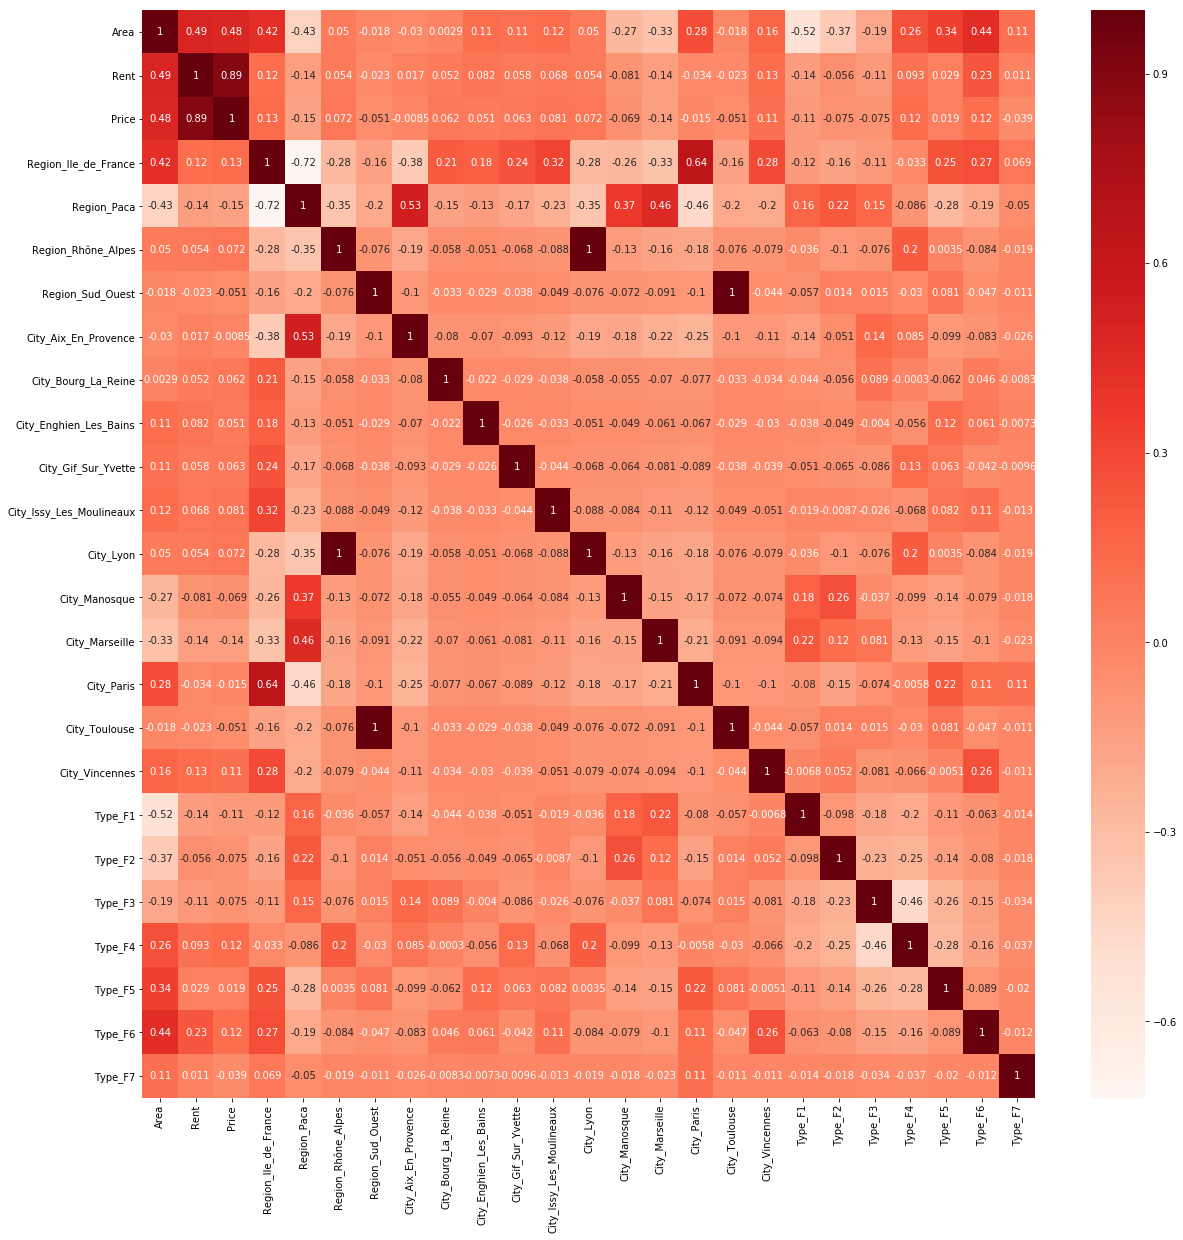

Area     0.481286
Rent     0.893104
Price    1.000000
Name: Price, dtype: float64


In [235]:
build_pearson_correlation_matrix_of_dataframe(20,20,df,"Price",0.2)

# Random Forest

In [134]:
y = df[['Price']]

# Dropping 

X = df.drop(['Price'], axis = 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Instantiate the Random Forest model

In [135]:
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

### Fitting the Random Forest model

In [136]:
random_forest.fit(X_train, y_train);

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


### Defining a function to print out the results of a model

In [137]:
def printing_out_results_of_a_model(model,X_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))

### Printing out the results of the Random Forest model

In [138]:
printing_out_results_of_a_model(random_forest,X_test,y_test)

R2 score:

76.32 %


Mean-squared error:

0.0044145753803905485


### Printing out the features importance of the Random Forest model

In [139]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                          importance
Rent                        0.845866
Area                        0.088927
Type_F5                     0.009955
Type_F3                     0.006864
Type_F4                     0.005731
Type_F6                     0.005048
Region_Paca                 0.004157
Region_Rhône_Alpes          0.004114
City_Lyon                   0.003736
City_Manosque               0.003453
City_Paris                  0.003103
Region_Ile_de_France        0.002937
City_Bourg_La_Reine         0.002714
City_Aix_En_Provence        0.001857
City_Vincennes              0.001811
City_Marseille              0.001786
Region_Sud_Ouest            0.001539
City_Gif_Sur_Yvette         0.001301
City_Toulouse               0.001187
City_Issy_Les_Moulineaux    0.000873
Type_F7                     0.000849
Type_F1                     0.000787
Type_F2                     0.000741
City_Enghien_Les_Bains      0.000663


### Conclusion

The results are decent but we need hyperparameters tuning to see if we can reach an accuracy that is high enough for the model to be useful, or if we need to use a different model.

# Hyperparameters tuning the Random Forest model

## Random Search

In [140]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

### Creating the random grid

In [141]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print (random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Instantiating the Random Search for the Random Forest model

In [142]:
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

### Fitting the Random Search for the Random Forest model

In [143]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

### Printing out the best hyperparameters given by the Random Search

In [144]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

### Printing out the accuracy of the model

In [145]:
printing_out_results_of_a_model(rf_random,X_test,y_test)

R2 score:

76.85 %


Mean-squared error:

0.004314661525384479


## Grid Search 

### Creating the grid

In [146]:
param_grid = {
    
    'bootstrap': [True],
    'max_depth': [60,70,80],
    'max_features': ['auto'],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [9,10,11],
    'n_estimators': [400]
    
}

### Instantiating the Grid Search for the Random Forest model

In [147]:
rf_grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

### Fitting the Grid Search for the Random Forest model

In [148]:
rf_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    8.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [60, 70, 80], 'max_features': ['auto'], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [9, 10, 11], 'n_estimators': [400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

### Printing out the best hyperparameters of the Grid Search for the Random Forest model

In [149]:
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 400}

### Printing out the results of the Grid Search for the Random Forest model

In [150]:
printing_out_results_of_a_model(rf_grid_search,X_test,y_test)

R2 score:

80.92 %


Mean-squared error:

0.0035562006635584216


### Exporting  one of the Decision Trees of the Random Forest to a dot file

In [240]:
export_graphviz(random_forest.estimators_[0],feature_names=X.columns,filled=True,rounded=True,out_file = "Images/tree.dot");

### Printing out the image of the Tree

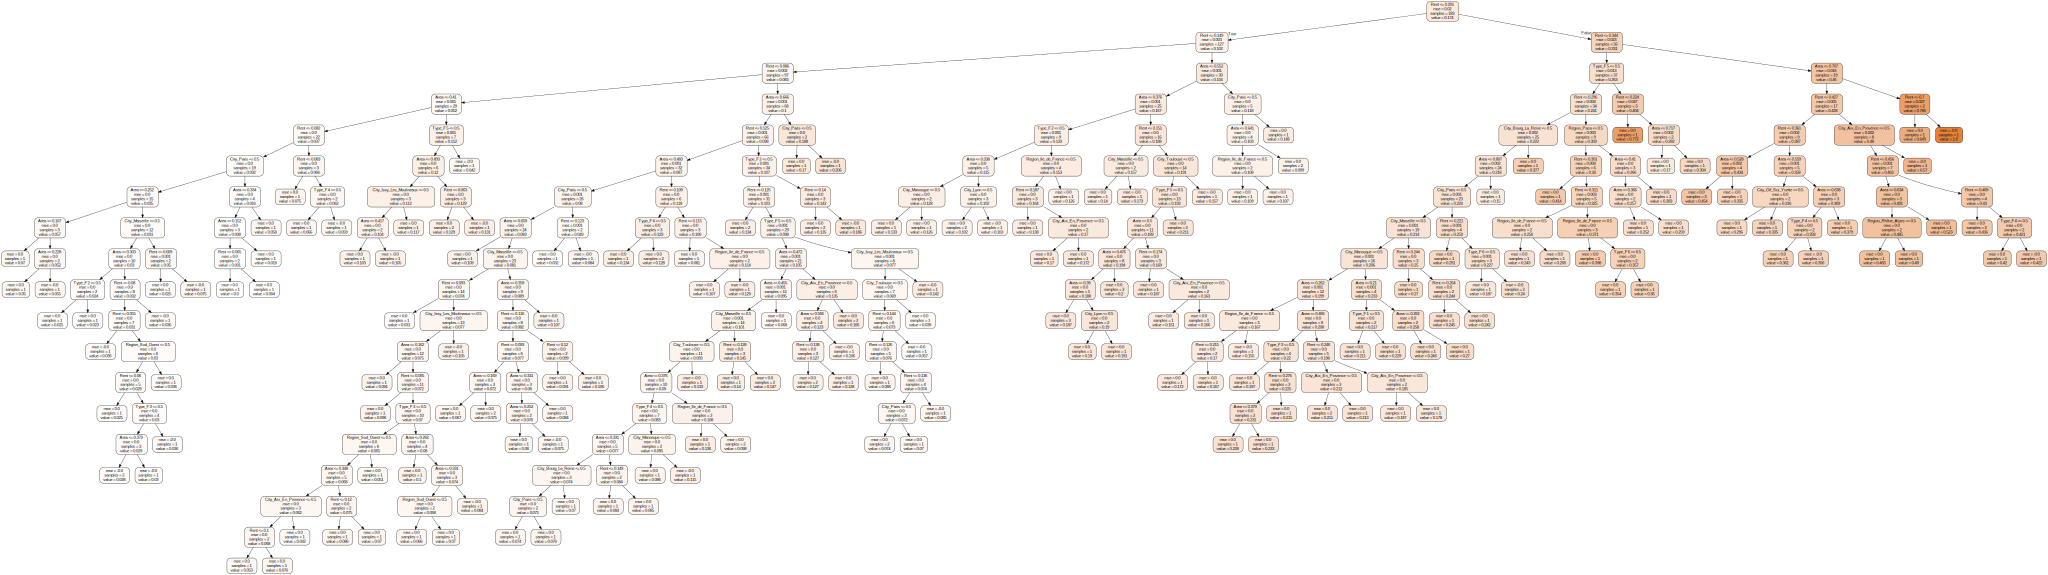

In [241]:
Source.from_file("Images/tree.dot")

### Conclusion

The accuracy reached by the Random Forest model is already quite impressive but we can surely improve it even more using XGBoost.

# XGBoost

In [154]:
y = df[['Price']]

X = df.drop(['Price'], axis = 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Instantiate the XGBoost model

In [155]:
xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.35,
                max_depth = 10, alpha = 0.1, n_estimators = 100)

### Fitting the XGBoost model

In [156]:
xgboost_regression.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Printing out the results of the XGBoost model

In [157]:
printing_out_results_of_a_model(xgboost_regression,X_test,y_test)

R2 score:

73.44 %


Mean-squared error:

0.0049515633501260176


### Conclusion

The XGBoost model gives good results but we have to use hyperparameters tuning to see the final result.

# Hyperparameters tuning the XGBoost model

## Random Search

In [167]:
print(xgboost_regression.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1, 'alpha': 0.1}


### Declaring the Grid for the Random Search

In [168]:
random_grid = {
    
 "learning_rate"    : [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
               
 "max_depth"        : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "min_child_weight" : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "gamma"            : [ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05 ],
    
 "subsample"        : [0.5, 0.6, 0.7, 0.8, 0.9 ],
    
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9 ],

}

### Instantiating the Random Search for the XGBoost model

In [169]:
xgb_random = RandomizedSearchCV(estimator = xgboost_regression, param_distributions = random_grid, n_iter = 5000, cv = 3, verbose=2, random_state=42, n_jobs = -1)

### Fitting the Random Search for the XGBoost model

In [170]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 10224 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12980 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5000, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'gamma': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]},
          pre_dis

### Printing out the best hyperparameters for the XGBoost model

In [171]:
xgb_random.best_params_

{'subsample': 0.8,
 'min_child_weight': 10,
 'max_depth': 14,
 'learning_rate': 0.35,
 'gamma': 0.04,
 'colsample_bytree': 0.6}

### Printing out the results of the XGBoost model after Random Search 

In [172]:
printing_out_results_of_a_model(xgb_random,X_test,y_test)

R2 score:

83.51 %


Mean-squared error:

0.003074038677550346


### Plotting the features importances for the XGBoost model

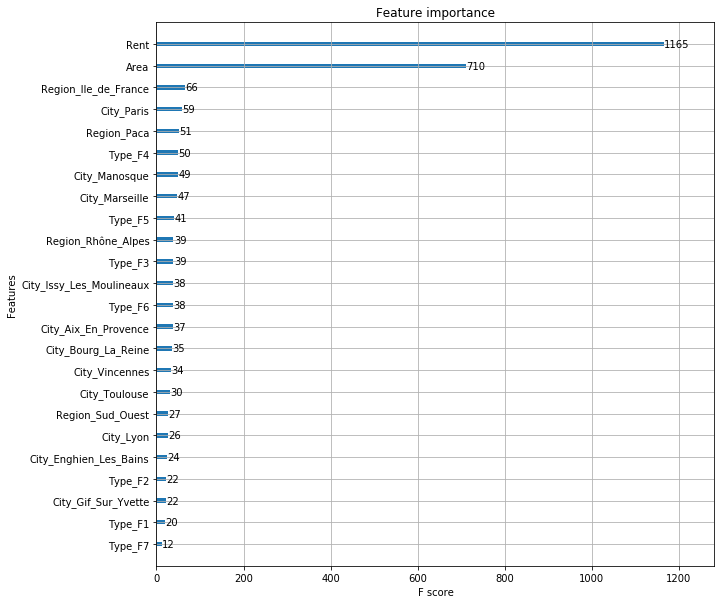

In [237]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgboost_regression, ax = ax)
plt.savefig('Images/xgboost_features_importance.png', bbox_inches='tight')
plt.show()

### Plotting out one Tree of the XGBoost model

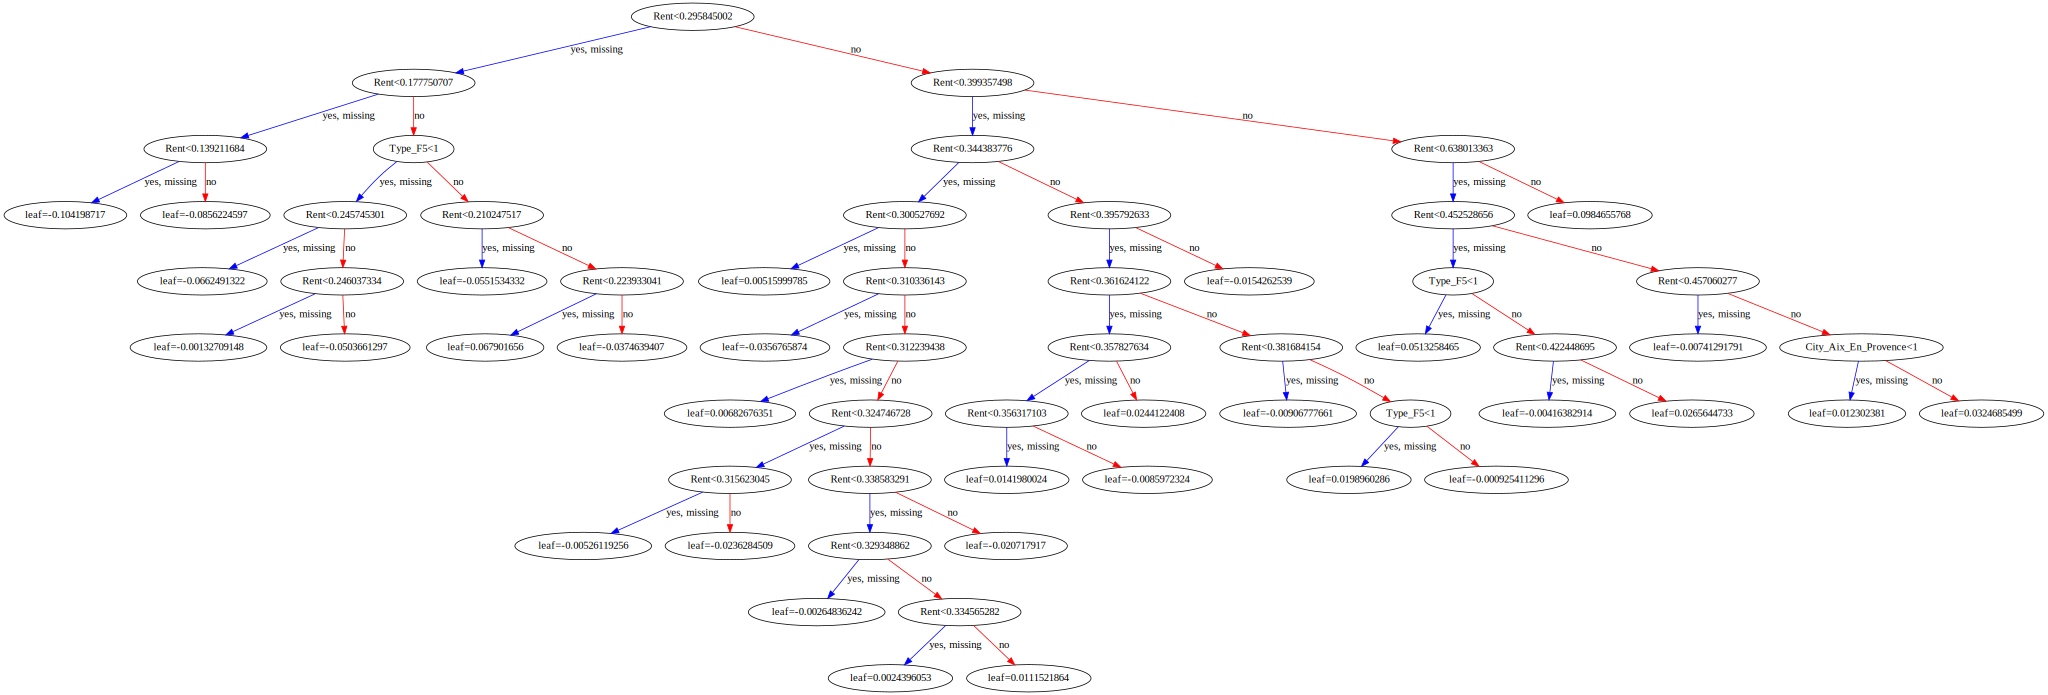

In [174]:
xgb.to_graphviz(xgboost_regression, num_trees=1)

### Export the image of one Tree of the XGBoost model

In [236]:
format = 'png' 

image = xgb.to_graphviz(xgboost_regression, num_trees=1)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'200'}

image.render('Images/xgboost_tree', format = format)

'Images/xgboost_tree.png'

# Conclusion

The accuracy reached by the XGBoost regression model is superior to the Random Forest one. 